Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

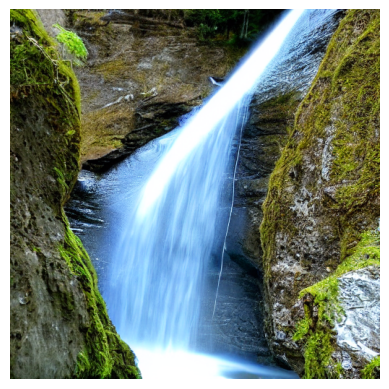

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load pretrained GAN model (Stable Diffusion) from Hugging Face
model_id = "runwayml/stable-diffusion-v1-5"  # Pretrained Stable Diffusion Model
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # Use GPU for faster processing

# Generate an image from a text prompt
prompt = "Blue colour waterfall"
image = pipe(prompt).images[0]

# Display the generated image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

# Save the image (optional)
image.save("generated_image.png")


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from peft import LoraConfig, get_peft_model
from transformers import TrainingArguments
import matplotlib.pyplot as plt

# ✅ Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Load Pretrained Stable Diffusion Model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

# ✅ LoRA Configuration for Stable Diffusion UNet
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["to_q", "to_k", "to_v", "to_out.0"],  # ✅ Targeting transformer layers
    lora_dropout=0.1
)

# ✅ Apply LoRA to UNet
pipe.unet = get_peft_model(pipe.unet, lora_config)

# ✅ Define Training Arguments
training_args = TrainingArguments(
    output_dir="./fine_tuned_sd",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    logging_dir="./logs",
    learning_rate=1e-4,
    weight_decay=0.01,
    save_total_limit=2,
    push_to_hub=False,
    fp16=True
)

# ✅ Generate an Image from Fine-Tuned Model
prompt = "A futuristic cityscape at night with neon lights"
image = pipe(prompt).images[0]

# ✅ Display the Generated Image
plt.imshow(image)
plt.axis("off")
plt.show()

# ✅ Save Fine-Tuned Model & Image
pipe.save_pretrained("./fine_tuned_sd")
image.save("fine_tuned_image.png")


Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

  0%|          | 0/50 [00:00<?, ?it/s]